In [1]:
import pandas as pd
from prophet import Prophet
import os
import plotly.graph_objects as go

In [2]:
os.chdir("/Users/abyvelazquez/Developer/Repos/DS_Projects/Criminalidad/data/")

In [3]:
list_alcaldias=[\
                "data_preparation_ALVARO_OBREGON.csv", \
                "data_preparation_AZCAPOTZALCO.csv", \
                "data_preparation_BENITO_JUAREZ.csv", \
                "data_preparation_COYOACAN.csv", \
                "data_preparation_CUAJIMALPA_DE_MORELOS.csv", \
                "data_preparation_CUAUHTEMOC.csv", \
                "data_preparation_GUSTAVO_A._MADERO.csv", \
                "data_preparation_IZTACALCO.csv", \
                "data_preparation_IZTAPALAPA.csv", \
                "data_preparation_LA_MAGDALENA_CONTRERAS.csv", \
                "data_preparation_MIGUEL_HIDALGO.csv", \
                "data_preparation_MILPA_ALTA.csv", \
                "data_preparation_TLAHUAC.csv", \
                "data_preparation_TLALPAN.csv", \
                "data_preparation_VENUSTIANO_CARRANZA.csv", \
                "data_preparation_XOCHIMILCO.csv"]
                

In [4]:
def get_riesgo_promedio(lista_alcaldias):
    for alcaldia in lista_alcaldias:
        data=pd.read_csv(alcaldia)
        prom_riesgo = data.loc[:, 'riesgo_delito'].mean()
        name_alcaldia = alcaldia[17:]
        print("Riesgo del delito promedio para ", name_alcaldia, "= ", prom_riesgo)
    

In [5]:
get_riesgo_promedio(list_alcaldias)

Riesgo del delito promedio para  ALVARO_OBREGON.csv =  4.961521807295477
Riesgo del delito promedio para  AZCAPOTZALCO.csv =  4.910157786616548
Riesgo del delito promedio para  BENITO_JUAREZ.csv =  4.276402867279705
Riesgo del delito promedio para  COYOACAN.csv =  4.427471420023305
Riesgo del delito promedio para  CUAJIMALPA_DE_MORELOS.csv =  4.569183620239958
Riesgo del delito promedio para  CUAUHTEMOC.csv =  4.31574953400476
Riesgo del delito promedio para  GUSTAVO_A._MADERO.csv =  4.948042376784891
Riesgo del delito promedio para  IZTACALCO.csv =  4.926536731634183
Riesgo del delito promedio para  IZTAPALAPA.csv =  5.159370829626335
Riesgo del delito promedio para  LA_MAGDALENA_CONTRERAS.csv =  4.866566799822459
Riesgo del delito promedio para  MIGUEL_HIDALGO.csv =  4.716895450228783
Riesgo del delito promedio para  MILPA_ALTA.csv =  4.879320049532815
Riesgo del delito promedio para  TLAHUAC.csv =  4.989566152742919
Riesgo del delito promedio para  TLALPAN.csv =  4.665302178496135
R

In [6]:
def get_riesgo_bajo_1_3(lista_alcaldias):
    df = pd.DataFrame(columns=['alcaldia_hechos', 'crimen_poblacion_ratio_bajo'])
    for alcaldia in lista_alcaldias:
        data=pd.read_csv(alcaldia)
        poblacion = data["poblacion_alcaldia"].head(1)
        data_bajos = data.loc[(data['riesgo_delito'] <= 3)]
        cantidad = len(data_bajos.index)/poblacion
        name_alcaldia = alcaldia[17:]
        new_row = pd.DataFrame({'alcaldia_hechos':name_alcaldia, 'crimen_poblacion_ratio_bajo':cantidad}, index=[0])
        df = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)

    return df

In [7]:
df_riesgo_1_3= get_riesgo_bajo_1_3(list_alcaldias)
df_riesgo_1_3.sort_values('crimen_poblacion_ratio_bajo', ascending=False)

alcaldia_hechos  crimen_poblacion_ratio_bajo
10              CUAUHTEMOC.csv                     0.116767
13           BENITO_JUAREZ.csv                     0.075623
5           MIGUEL_HIDALGO.csv                     0.057558
1      VENUSTIANO_CARRANZA.csv                     0.048636
12                COYOACAN.csv                     0.046660
14            AZCAPOTZALCO.csv                     0.041226
8                IZTACALCO.csv                     0.038708
2                  TLALPAN.csv                     0.034031
15          ALVARO_OBREGON.csv                     0.032923
9        GUSTAVO_A._MADERO.csv                     0.030640
7               IZTAPALAPA.csv                     0.027888
0               XOCHIMILCO.csv                     0.027849
11   CUAJIMALPA_DE_MORELOS.csv                     0.027668
3                  TLAHUAC.csv                     0.026364
6   LA_MAGDALENA_CONTRERAS.csv                     0.026133
4               MILPA_ALTA.csv                     0.020153

In [8]:
def get_riesgo_medio_4_6(lista_alcaldias):
    df = pd.DataFrame(columns=['alcaldia_hechos', 'crimen_poblacion_ratio_medio'])
    for alcaldia in lista_alcaldias:
        data=pd.read_csv(alcaldia)
        poblacion = data["poblacion_alcaldia"].head(1)
        data_medios = data.loc[(data['riesgo_delito'] >= 4) & (data['riesgo_delito'] <= 6)]
        cantidad = len(data_medios.index)/poblacion
        name_alcaldia = alcaldia[17:]
        new_row = pd.DataFrame({'alcaldia_hechos':name_alcaldia, 'crimen_poblacion_ratio_medio':cantidad}, index=[0])
        df = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)

    return df

In [9]:
df_riesgo_4_6= get_riesgo_medio_4_6(list_alcaldias)
df_riesgo_4_6.sort_values('crimen_poblacion_ratio_medio', ascending=False)

alcaldia_hechos  crimen_poblacion_ratio_medio
10              CUAUHTEMOC.csv                      0.083226
13           BENITO_JUAREZ.csv                      0.054280
5           MIGUEL_HIDALGO.csv                      0.046732
1      VENUSTIANO_CARRANZA.csv                      0.042587
12                COYOACAN.csv                      0.038345
14            AZCAPOTZALCO.csv                      0.036823
8                IZTACALCO.csv                      0.035990
6   LA_MAGDALENA_CONTRERAS.csv                      0.033123
15          ALVARO_OBREGON.csv                      0.032047
9        GUSTAVO_A._MADERO.csv                      0.031723
11   CUAJIMALPA_DE_MORELOS.csv                      0.030751
2                  TLALPAN.csv                      0.030647
4               MILPA_ALTA.csv                      0.027540
3                  TLAHUAC.csv                      0.027269
7               IZTAPALAPA.csv                      0.026893
0               XOCHIMILCO.csv                      0.026862

In [10]:
def get_riesgo_alto_7_10(lista_alcaldias):
    df = pd.DataFrame(columns=['alcaldia_hechos', 'crimen_poblacion_ratio_alto'])
    for alcaldia in lista_alcaldias:
        data=pd.read_csv(alcaldia)
        poblacion = data["poblacion_alcaldia"].head(1)
        data_altos = data.loc[(data['riesgo_delito'] >= 7)]
        cantidad = len(data_altos.index)/poblacion
        name_alcaldia = alcaldia[17:]
        new_row = pd.DataFrame({'alcaldia_hechos':name_alcaldia, 'crimen_poblacion_ratio_alto':cantidad}, index=[0])
        df = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)

    return df

In [11]:
df_riesgo_7_10= get_riesgo_alto_7_10(list_alcaldias)
df_riesgo_7_10.sort_values('crimen_poblacion_ratio_alto', ascending=False)

alcaldia_hechos  crimen_poblacion_ratio_alto
10              CUAUHTEMOC.csv                     0.048651
5           MIGUEL_HIDALGO.csv                     0.035443
1      VENUSTIANO_CARRANZA.csv                     0.031708
13           BENITO_JUAREZ.csv                     0.029153
14            AZCAPOTZALCO.csv                     0.027822
8                IZTACALCO.csv                     0.025839
7               IZTAPALAPA.csv                     0.023602
15          ALVARO_OBREGON.csv                     0.023253
9        GUSTAVO_A._MADERO.csv                     0.020898
12                COYOACAN.csv                     0.018350
3                  TLAHUAC.csv                     0.017458
2                  TLALPAN.csv                     0.016645
0               XOCHIMILCO.csv                     0.016154
6   LA_MAGDALENA_CONTRERAS.csv                     0.013533
11   CUAJIMALPA_DE_MORELOS.csv                     0.012031
4               MILPA_ALTA.csv                     0.010486

In [12]:
df_temp = pd.merge(df_riesgo_1_3, df_riesgo_4_6, on="alcaldia_hechos", how="left")
df_final = pd.merge(df_temp, df_riesgo_7_10, on="alcaldia_hechos", how="left")

In [13]:
df_final.head(17)

alcaldia_hechos  crimen_poblacion_ratio_bajo  \
0               XOCHIMILCO.csv                     0.027849   
1      VENUSTIANO_CARRANZA.csv                     0.048636   
2                  TLALPAN.csv                     0.034031   
3                  TLAHUAC.csv                     0.026364   
4               MILPA_ALTA.csv                     0.020153   
5           MIGUEL_HIDALGO.csv                     0.057558   
6   LA_MAGDALENA_CONTRERAS.csv                     0.026133   
7               IZTAPALAPA.csv                     0.027888   
8                IZTACALCO.csv                     0.038708   
9        GUSTAVO_A._MADERO.csv                     0.030640   
10              CUAUHTEMOC.csv                     0.116767   
11   CUAJIMALPA_DE_MORELOS.csv                     0.027668   
12                COYOACAN.csv                     0.046660   
13           BENITO_JUAREZ.csv                     0.075623   
14            AZCAPOTZALCO.csv                     0.041226   
15          ALVARO_OBREGON.csv                     0.032923   

    crimen_poblacion_ratio_medio  crimen_poblacion_ratio_alto  
0                       0.026862                     0.016154  
1                       0.042587                     0.031708  
2                       0.030647                     0.016645  
3                       0.027269                     0.017458  
4                       0.027540                     0.010486  
5                       0.046732                     0.035443  
6                       0.033123                     0.013533  
7                       0.026893                     0.023602  
8                       0.035990                     0.025839  
9                       0.031723                     0.020898  
10                      0.083226                     0.048651  
11                      0.030751                     0.012031  
12                      0.038345                     0.018350  
13                      0.054280                     0.029153  
14                      0.036823                     0.027822  
15                      0.032047                     0.023253

## Model Milpa Alta by riesgo_delito ={4,5,6}

In [14]:
df_milpa_alta = pd.read_csv("data_preparation_MILPA_ALTA.csv")
df_milpa_alta = df_milpa_alta.loc[(df_milpa_alta["riesgo_delito"] >=4) & (df_milpa_alta["riesgo_delito"] <=6)]
df_milpa_alta["FechaHecho"] = df_milpa_alta["FechaHecho"].astype("datetime64")
df_milpa_alta_riesgo_medio= df_milpa_alta.groupby(df_milpa_alta['FechaHecho'].dt.date).size().reset_index(name='conteo')
df_milpa_alta_riesgo_medio.rename(columns = {'FechaHecho':'ds', 'conteo':'y'}, inplace = True)

In [15]:
df_milpa_alta_riesgo_medio.head()

ds  y
0  2019-01-02  1
1  2019-01-03  1
2  2019-01-04  5
3  2019-01-05  2
4  2019-01-06  1

In [16]:
m_milpa_alta_riesgo_medio = Prophet()
m_milpa_alta_riesgo_medio.fit(df_milpa_alta_riesgo_medio)
# Hacemos un dataframe de fechas futuras
future_milpa_alta_riesgo_medio = m_milpa_alta_riesgo_medio.make_future_dataframe(periods=365)
future_milpa_alta_riesgo_medio.tail()

03:08:24 - cmdstanpy - INFO - Chain [1] start processing
03:08:24 - cmdstanpy - INFO - Chain [1] done processing


ds
1702 2023-12-26
1703 2023-12-27
1704 2023-12-28
1705 2023-12-29
1706 2023-12-30

In [17]:
forecast_milpa_alta_riesgo_medio = m_milpa_alta_riesgo_medio.predict(future_milpa_alta_riesgo_medio)
forecast_milpa_alta_riesgo_medio[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1702 2023-12-26  4.377751    1.829918    6.829182
1703 2023-12-27  4.580833    2.425780    7.092758
1704 2023-12-28  4.250158    2.007185    6.632151
1705 2023-12-29  4.620975    2.363568    6.988120
1706 2023-12-30  4.706520    2.286424    7.038406

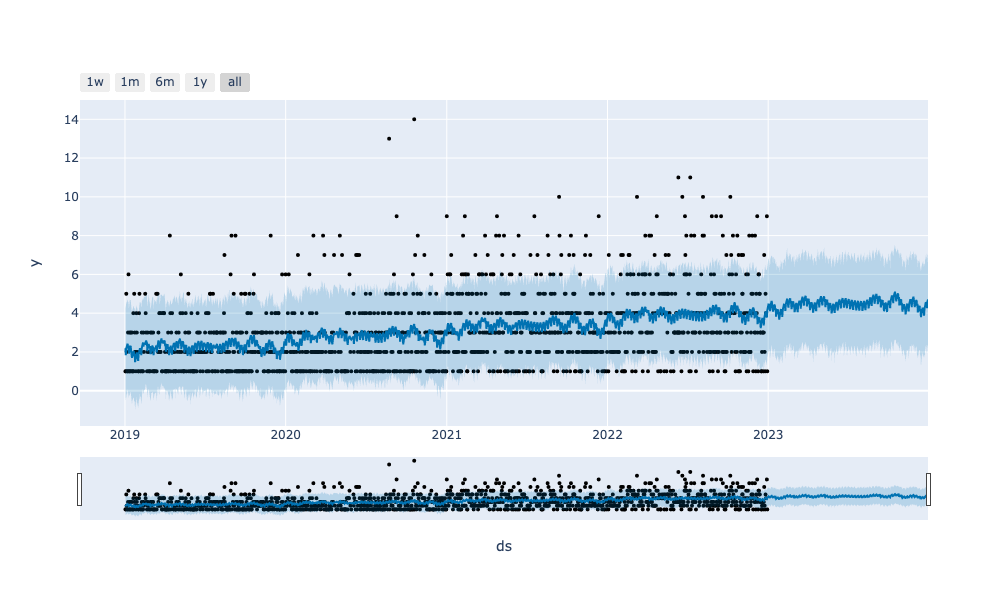

In [18]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m_milpa_alta_riesgo_medio, forecast_milpa_alta_riesgo_medio)

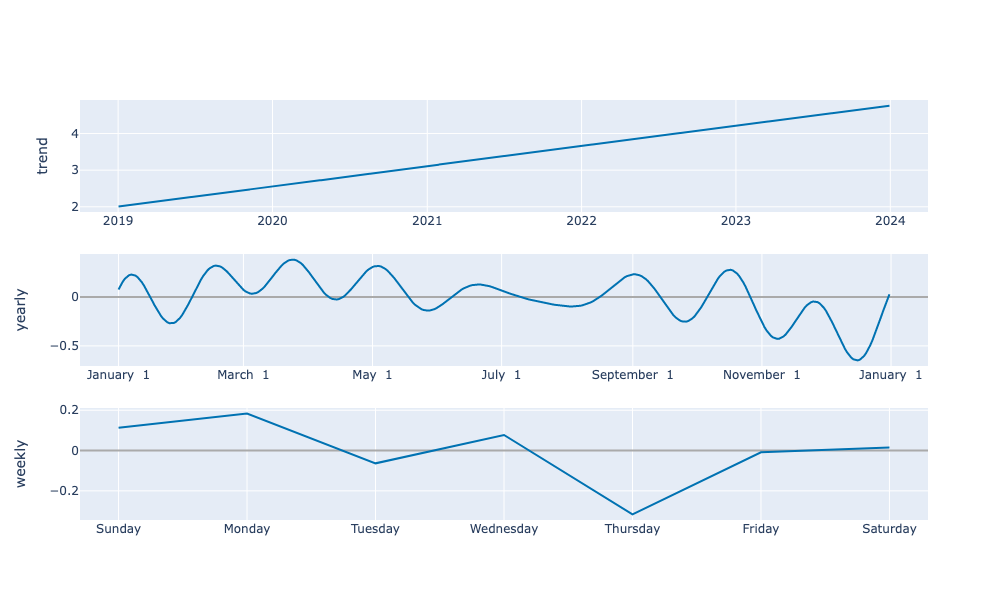

In [19]:
plot_components_plotly(m_milpa_alta_riesgo_medio, forecast_milpa_alta_riesgo_medio)

## Model Cuauhtemoc by riesgo_delito ={1,2,3}

In [20]:
df_cuauhtemoc = pd.read_csv("data_preparation_CUAUHTEMOC.csv")
df_cuauhtemoc = df_cuauhtemoc.loc[(df_cuauhtemoc["riesgo_delito"] <=3) ]
df_cuauhtemoc["FechaHecho"] = df_cuauhtemoc["FechaHecho"].astype("datetime64")
df_cuauhtemoc_riesgo_bajo= df_cuauhtemoc.groupby(df_cuauhtemoc['FechaHecho'].dt.date).size().reset_index(name='conteo')
df_cuauhtemoc_riesgo_bajo.rename(columns = {'FechaHecho':'ds', 'conteo':'y'}, inplace = True)

In [21]:
df_cuauhtemoc_riesgo_bajo.head()

ds   y
0  2019-01-01  53
1  2019-01-02  71
2  2019-01-03  90
3  2019-01-04  79
4  2019-01-05  57

In [22]:
m_cuauhtemoc_riesgo_bajo = Prophet()
m_cuauhtemoc_riesgo_bajo.fit(df_cuauhtemoc_riesgo_bajo)
# Hacemos un dataframe de fechas futuras
future_cuauhtemoc_riesgo_bajo = m_cuauhtemoc_riesgo_bajo.make_future_dataframe(periods=365)
future_cuauhtemoc_riesgo_bajo.tail()

03:08:26 - cmdstanpy - INFO - Chain [1] start processing
03:08:26 - cmdstanpy - INFO - Chain [1] done processing


ds
1821 2023-12-27
1822 2023-12-28
1823 2023-12-29
1824 2023-12-30
1825 2023-12-31

In [23]:
forecast_cuauhtemoc_riesgo_bajo = m_cuauhtemoc_riesgo_bajo.predict(future_cuauhtemoc_riesgo_bajo)
forecast_cuauhtemoc_riesgo_bajo[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1821 2023-12-27  38.113404   20.489385   55.461815
1822 2023-12-28  40.114516   23.993338   56.751954
1823 2023-12-29  41.054466   23.440149   57.591578
1824 2023-12-30  35.111833   17.877990   52.382254
1825 2023-12-31  30.161036   14.146367   46.780739

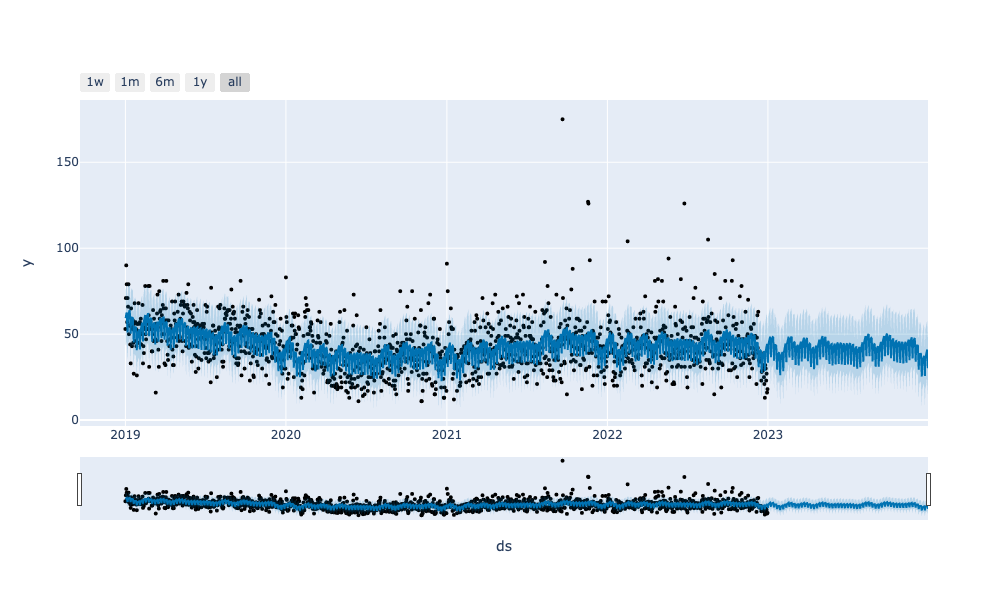

In [24]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m_cuauhtemoc_riesgo_bajo, forecast_cuauhtemoc_riesgo_bajo)

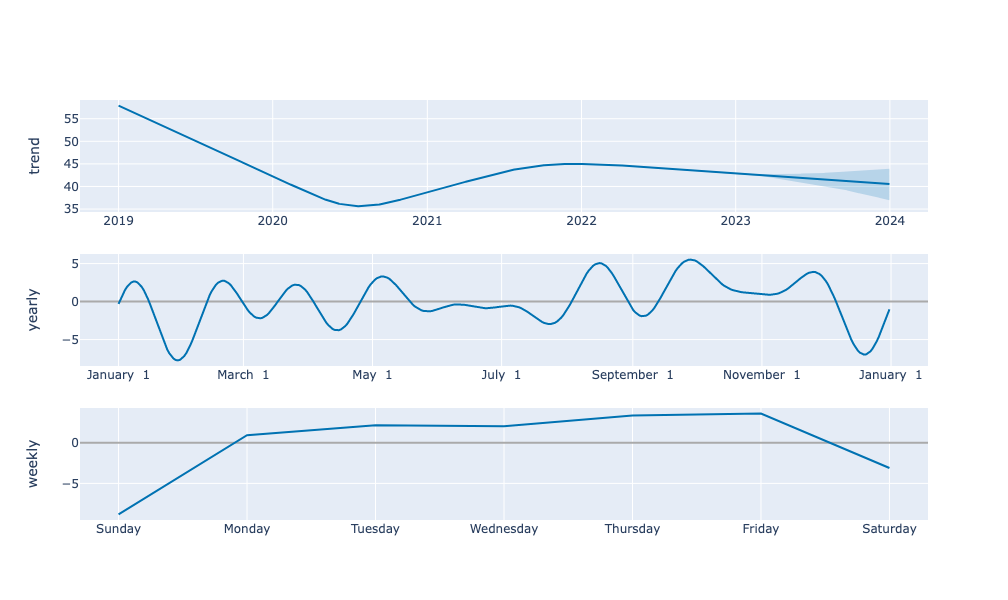

In [25]:
plot_components_plotly(m_cuauhtemoc_riesgo_bajo, forecast_cuauhtemoc_riesgo_bajo)

## Model Cuauhtemoc by riesgo_delito ={7,6,8,9,19}

In [26]:
df_cuauhtemoc = pd.read_csv("data_preparation_CUAUHTEMOC.csv")
df_cuauhtemoc = df_cuauhtemoc.loc[(df_cuauhtemoc["riesgo_delito"] >=7) ]
df_cuauhtemoc["FechaHecho"] = df_cuauhtemoc["FechaHecho"].astype("datetime64")
df_cuauhtemoc_riesgo_alto= df_cuauhtemoc.groupby(df_cuauhtemoc['FechaHecho'].dt.date).size().reset_index(name='conteo')
df_cuauhtemoc_riesgo_alto.rename(columns = {'FechaHecho':'ds', 'conteo':'y'}, inplace = True)

In [27]:
df_cuauhtemoc_riesgo_alto.head()

ds   y
0  2019-01-01  16
1  2019-01-02  42
2  2019-01-03  32
3  2019-01-04  39
4  2019-01-05  29

In [28]:
m_cuauhtemoc_riesgo_alto = Prophet()
m_cuauhtemoc_riesgo_alto.fit(df_cuauhtemoc_riesgo_alto)
# Hacemos un dataframe de fechas futuras
future_cuauhtemoc_riesgo_alto = m_cuauhtemoc_riesgo_alto.make_future_dataframe(periods=365)
future_cuauhtemoc_riesgo_alto.tail()

03:08:28 - cmdstanpy - INFO - Chain [1] start processing
03:08:28 - cmdstanpy - INFO - Chain [1] done processing


ds
1819 2023-12-26
1820 2023-12-27
1821 2023-12-28
1822 2023-12-29
1823 2023-12-30

In [29]:
forecast_cuauhtemoc_riesgo_alto = m_cuauhtemoc_riesgo_alto.predict(future_cuauhtemoc_riesgo_alto)
forecast_cuauhtemoc_riesgo_alto[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1819 2023-12-26  12.532875    4.101009   20.200928
1820 2023-12-27  13.228276    5.301765   20.660080
1821 2023-12-28  13.499361    5.591296   21.077511
1822 2023-12-29  15.075220    7.213720   22.715676
1823 2023-12-30  12.047638    4.637540   20.069926

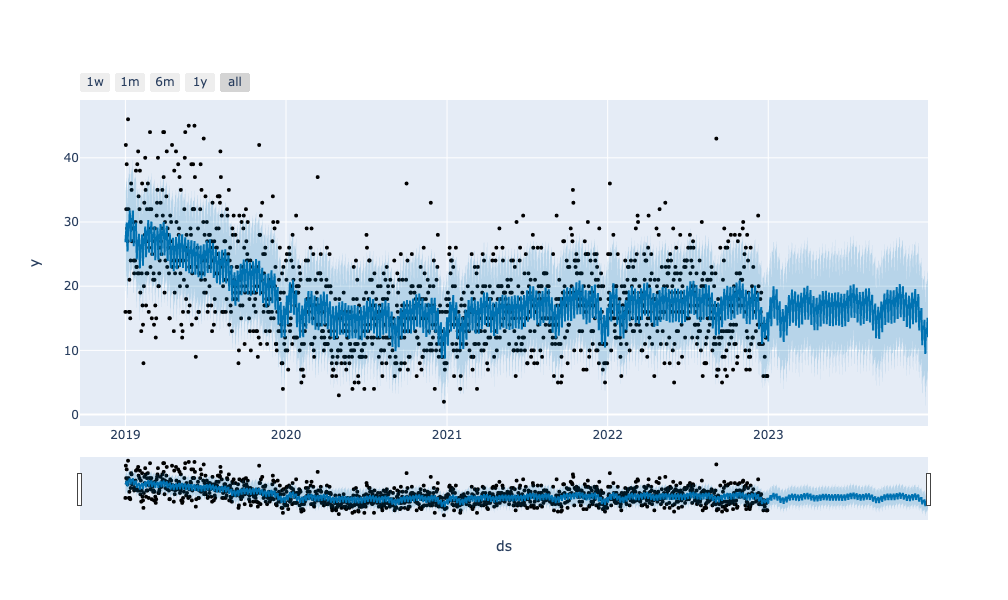

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m_cuauhtemoc_riesgo_alto, forecast_cuauhtemoc_riesgo_alto)

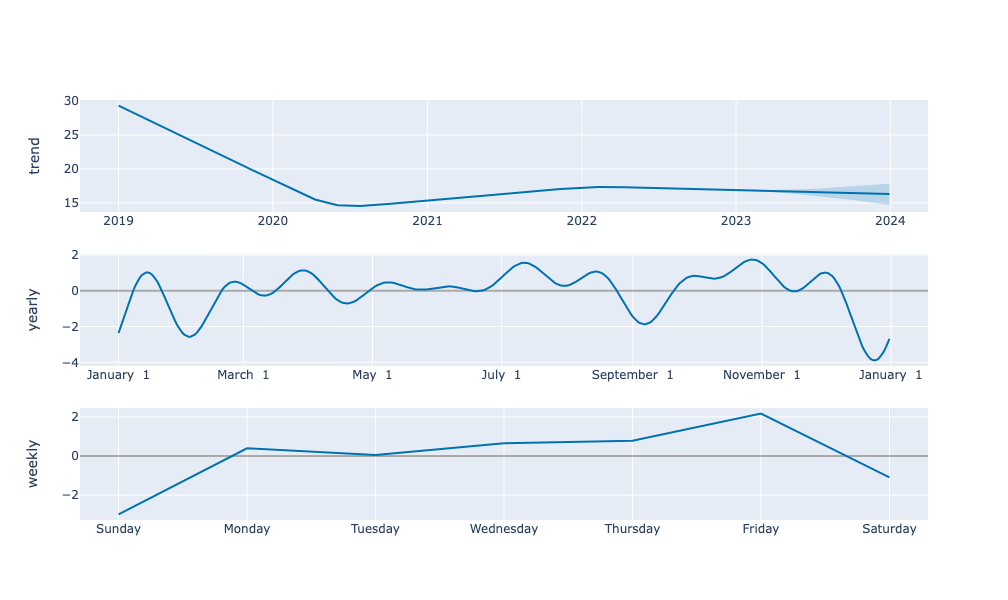

In [31]:
plot_components_plotly(m_cuauhtemoc_riesgo_alto, forecast_cuauhtemoc_riesgo_alto)

## Cross validation para Milpa Alta riesgo medio

In [50]:
from prophet.diagnostics import cross_validation
df_cv_milpa_alta_riesgo_medio = cross_validation(m_milpa_alta_riesgo_medio, initial='730 days', period='90 days', horizon = '180 days')


  0%|          | 0/7 [00:00<?, ?it/s]

03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:04 - cmdstanpy - INFO - Chain [1] start processing
03:33:04 - cmdstanpy - INFO - Chain [1] done processing
03:33:05 - cmdstanpy - INFO - Chain [1] start processing
03:33:05 - cmdstanpy - INFO - Chain [1] done processing
03:33:05 - cmdstanpy - INFO - Chain [1] start processing
03:33:05 - cmdstanpy - INFO - Chain [1] done processing
03:33:05 - cmdstanpy - INFO - Chain [1] start processing
03:33:05 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
df_cv_milpa_alta_riesgo_medio.head()

ds      yhat  yhat_lower  yhat_upper  y     cutoff
0 2021-01-10  3.714831    1.582723    5.933589  5 2021-01-09
1 2021-01-11  3.545363    1.474036    5.838936  7 2021-01-09
2 2021-01-12  3.382306    1.335755    5.546070  3 2021-01-09
3 2021-01-13  3.550279    1.505355    5.604328  5 2021-01-09
4 2021-01-14  3.156280    0.973227    5.244588  5 2021-01-09

In [52]:
from prophet.diagnostics import performance_metrics
df_p_milpa_alta_riesgo_medio = performance_metrics(df_cv_milpa_alta_riesgo_medio)
df_p_milpa_alta_riesgo_medio.head()

horizon       mse      rmse       mae      mape     mdape     smape  \
0 19 days  4.519853  2.125995  1.612839  0.615062  0.395761  0.444350   
1 20 days  4.376798  2.092080  1.582705  0.607276  0.379455  0.438950   
2 21 days  4.304761  2.074792  1.556603  0.583531  0.368744  0.428673   
3 22 days  4.287357  2.070593  1.563023  0.615143  0.379455  0.439722   
4 23 days  4.054676  2.013623  1.542427  0.654613  0.412008  0.450467   

   coverage  
0  0.735537  
1  0.753247  
2  0.775679  
3  0.785124  
4  0.789847

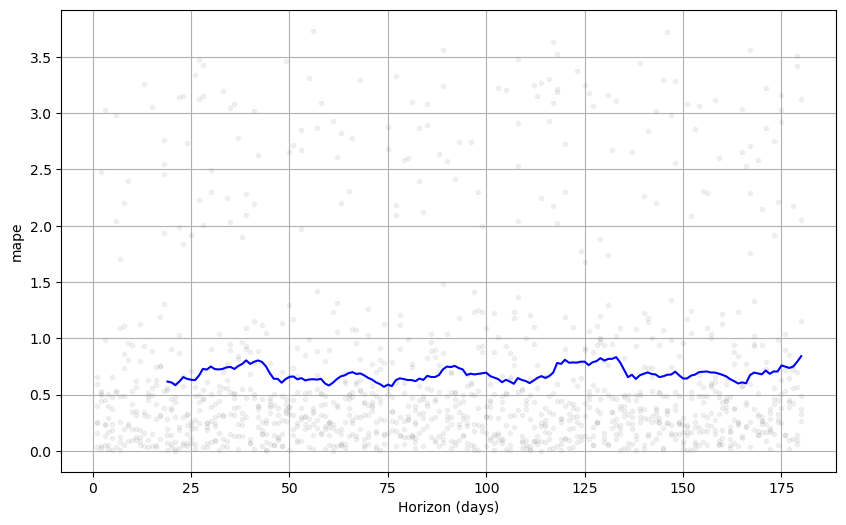

In [60]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_milpa_alta_riesgo_medio, metric='mape')

## Cross validation para Cuauhtemoc riesgo bajo

In [56]:
from prophet.diagnostics import cross_validation
df_cv_cuauhtemoc_riesgo_bajo = cross_validation(m_cuauhtemoc_riesgo_bajo, initial='730 days', period='90 days', horizon = '180 days')


  0%|          | 0/7 [00:00<?, ?it/s]

03:48:34 - cmdstanpy - INFO - Chain [1] start processing
03:48:34 - cmdstanpy - INFO - Chain [1] done processing
03:48:35 - cmdstanpy - INFO - Chain [1] start processing
03:48:35 - cmdstanpy - INFO - Chain [1] done processing
03:48:35 - cmdstanpy - INFO - Chain [1] start processing
03:48:35 - cmdstanpy - INFO - Chain [1] done processing
03:48:35 - cmdstanpy - INFO - Chain [1] start processing
03:48:35 - cmdstanpy - INFO - Chain [1] done processing
03:48:35 - cmdstanpy - INFO - Chain [1] start processing
03:48:35 - cmdstanpy - INFO - Chain [1] done processing
03:48:36 - cmdstanpy - INFO - Chain [1] start processing
03:48:36 - cmdstanpy - INFO - Chain [1] done processing
03:48:36 - cmdstanpy - INFO - Chain [1] start processing
03:48:36 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
df_cv_cuauhtemoc_riesgo_bajo.head()

ds       yhat  yhat_lower  yhat_upper   y     cutoff
0 2021-01-11  42.182779   26.657882   57.397085  54 2021-01-10
1 2021-01-12  41.912833   27.467510   58.542153  53 2021-01-10
2 2021-01-13  42.268294   27.860326   58.055552  41 2021-01-10
3 2021-01-14  42.857787   27.312350   56.840569  24 2021-01-10
4 2021-01-15  42.399522   26.037295   56.159046  53 2021-01-10

In [58]:
from prophet.diagnostics import performance_metrics
df_p_cuauhtemoc_riesgo_bajo = performance_metrics(df_cv_cuauhtemoc_riesgo_bajo)
df_p_cuauhtemoc_riesgo_bajo.head()

horizon         mse       rmse        mae      mape     mdape     smape  \
0 18 days  189.051600  13.749604  10.387383  0.265694  0.202719  0.247881   
1 19 days  180.154307  13.422157  10.104459  0.263681  0.202719  0.242876   
2 20 days  178.923521  13.376230  10.015257  0.263540  0.194699  0.241345   
3 21 days  189.045285  13.749374  10.310750  0.268763  0.203022  0.246419   
4 22 days  183.116858  13.532068  10.156775  0.263636  0.203022  0.243012   

   coverage  
0  0.785714  
1  0.801587  
2  0.793651  
3  0.785714  
4  0.801587

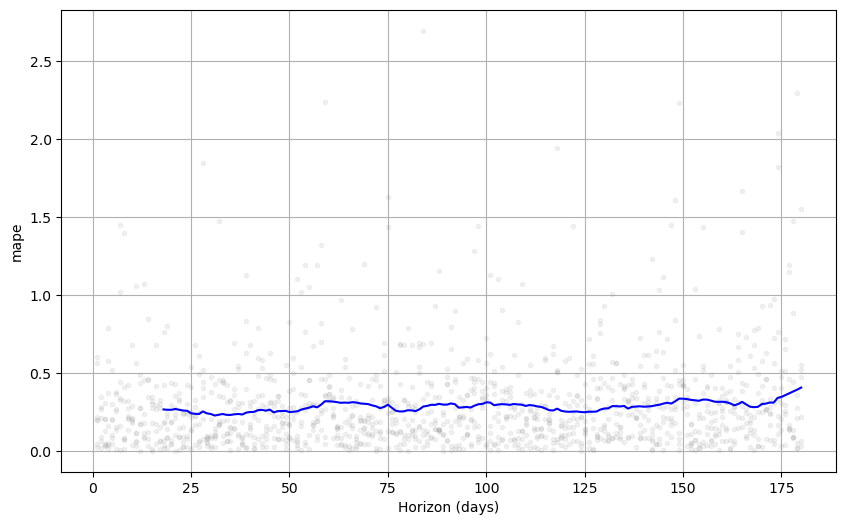

In [61]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_cuauhtemoc_riesgo_bajo, metric='mape')

## Cross validation para Cuauhtemoc riesgo alto

In [62]:
from prophet.diagnostics import cross_validation
df_cv_cuauhtemoc_riesgo_alto = cross_validation(m_cuauhtemoc_riesgo_alto, initial='730 days', period='90 days', horizon = '180 days')


  0%|          | 0/7 [00:00<?, ?it/s]

03:58:39 - cmdstanpy - INFO - Chain [1] start processing
03:58:39 - cmdstanpy - INFO - Chain [1] done processing
03:58:39 - cmdstanpy - INFO - Chain [1] start processing
03:58:39 - cmdstanpy - INFO - Chain [1] done processing
03:58:39 - cmdstanpy - INFO - Chain [1] start processing
03:58:39 - cmdstanpy - INFO - Chain [1] done processing
03:58:39 - cmdstanpy - INFO - Chain [1] start processing
03:58:39 - cmdstanpy - INFO - Chain [1] done processing
03:58:40 - cmdstanpy - INFO - Chain [1] start processing
03:58:40 - cmdstanpy - INFO - Chain [1] done processing
03:58:40 - cmdstanpy - INFO - Chain [1] start processing
03:58:40 - cmdstanpy - INFO - Chain [1] done processing
03:58:40 - cmdstanpy - INFO - Chain [1] start processing
03:58:40 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
df_cv_cuauhtemoc_riesgo_alto.head()

ds       yhat  yhat_lower  yhat_upper   y     cutoff
0 2021-01-10  12.754897    5.237440   21.301318  24 2021-01-09
1 2021-01-11  15.165123    6.976257   23.189917  14 2021-01-09
2 2021-01-12  15.057217    7.140213   23.560336  24 2021-01-09
3 2021-01-13  16.112512    8.313298   24.511231  11 2021-01-09
4 2021-01-14  16.649882    8.086513   25.175575  20 2021-01-09

In [64]:
from prophet.diagnostics import performance_metrics
df_p_cuauhtemoc_riesgo_alto = performance_metrics(df_cv_cuauhtemoc_riesgo_alto)
df_p_cuauhtemoc_riesgo_alto.head()

horizon        mse      rmse       mae      mape     mdape     smape  \
0 18 days  36.915423  6.075806  4.819483  0.283076  0.264463  0.274515   
1 19 days  35.336175  5.944424  4.689226  0.276560  0.263018  0.267802   
2 20 days  33.467363  5.785098  4.614063  0.274617  0.263018  0.265141   
3 21 days  32.491684  5.700148  4.473297  0.266210  0.247999  0.257323   
4 22 days  31.563431  5.618134  4.360075  0.265737  0.212931  0.253585   

   coverage  
0  0.825143  
1  0.833143  
2  0.834286  
3  0.841143  
4  0.849143

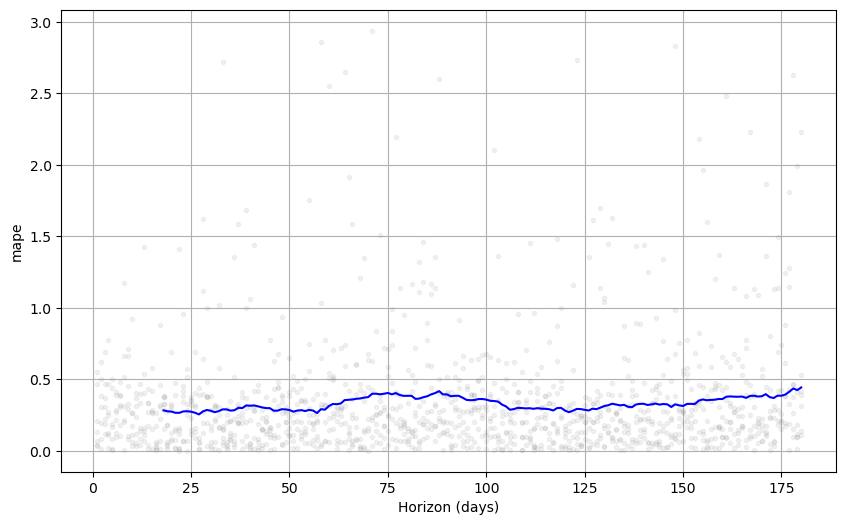

In [65]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_cuauhtemoc_riesgo_alto, metric='mape')